## Import Necessary Libraries

In [364]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras import models, layers
from keras_preprocessing.image import load_img, array_to_img, img_to_array, ImageDataGenerator
from tensorflow.keras.optimizers import  Adam
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import itertools

## Load the Files of Images

In [365]:
datagen = ImageDataGenerator()

In [366]:
train_path =  './data/fruits-360_dataset/fruits-360/Training'
test_path = './data/fruits-360_dataset/fruits-360/Test'
val_path = './data/fruits-360_dataset/fruits-360/Validation'

In [367]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, 
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [368]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (200, 200),
    batch_size = 30,
    color_mode = 'rgb',
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (200, 200),
    batch_size = 30,
    color_mode = 'rgb',
    class_mode = 'categorical')

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size = (200, 200),
    batch_size = 30,
    color_mode = 'rgb',
    class_mode = 'categorical')

Found 4711 images belonging to 6 classes.
Found 1751 images belonging to 6 classes.
Found 523 images belonging to 6 classes.


In [369]:
train_class_names = list(train_generator.class_indices.keys())
train_class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red Delicious']

In [370]:
test_class_names = list(test_generator.class_indices.keys())
test_class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red Delicious']

In [371]:
val_class_names = list(val_generator.class_indices.keys())
val_class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red Delicious']

## Begin Modeling

#### Baseline Model

In [372]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [373]:
# train_img = train_images.reshape(train_images.shape[0], -1)
# test_img = test_images.reshape(test_images.shape[0], -1)
# val_img = val_images.reshape(val_images.shape[0], -1)

In [374]:
print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(30, 120000)
(30, 120000)
(30, 120000)


In [375]:
train_images.shape

(30, 200, 200, 3)

In [376]:
train_labels.shape

(30, 6)

In [377]:
train_y = np.reshape(train_labels[:,0], (30, ))
test_y = np.reshape(test_labels[:,0], (30, ))
val_y = np.reshape(val_labels[:,0], (30, ))

In [378]:
np.random.seed(3)
baseline_model = models.Sequential()
baseline_model.add(layers.Conv2D(20, (3,3), activation='relu', input_shape=(200, 200, 3))) # 2 hidden layers
baseline_model.add(layers.MaxPooling2D(2,2))
baseline_model.add(layers.Flatten())
baseline_model.add(layers.Dense(10, activation='relu'))
baseline_model.add(layers.Dense(10, activation='relu'))
baseline_model.add(layers.Dense(6, activation='softmax'))

In [379]:
train_y.shape

(30,)

In [380]:
train_img.shape

(30, 120000)

In [381]:
val_img.shape

(30, 120000)

In [382]:
val_y.shape

(30,)

In [383]:
baseline_model.compile(optimizer='sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

baseline_histoire = baseline_model.fit(train_images,
                    train_labels,
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (val_images, val_labels))

Epoch 1/30
1/2 [==============>...............] - ETA: 0s - loss: 1.8503 - accuracy: 0.2000

2022-12-06 14:25:07.363684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-12-06 14:25:07.551807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 157ms/step - loss: 2.1866 - accuracy: 0.2333 - val_loss: 1.7939 - val_accuracy: 0.1333
Epoch 2/30
2/2 [==============================] - 0s 49ms/step - loss: 2.0012 - accuracy: 0.2000 - val_loss: 1.7903 - val_accuracy: 0.1667
Epoch 3/30
2/2 [==============================] - 0s 44ms/step - loss: 1.7892 - accuracy: 0.2000 - val_loss: 1.7884 - val_accuracy: 0.1667
Epoch 4/30
2/2 [==============================] - 0s 46ms/step - loss: 1.7873 - accuracy: 0.1667 - val_loss: 1.7865 - val_accuracy: 0.4667
Epoch 5/30
2/2 [==============================] - 0s 47ms/step - loss: 1.7857 - accuracy: 0.3333 - val_loss: 1.7850 - val_accuracy: 0.4667
Epoch 6/30
2/2 [==============================] - 0s 44ms/step - loss: 1.7838 - accuracy: 0.3333 - val_loss: 1.7834 - val_accuracy: 0.4667
Epoch 7/30
2/2 [==============================] - 0s 45ms/step - loss: 1.7821 - accuracy: 0.3333 - val_loss: 1.7815 - val_accuracy: 0.4667
Epoch 8/30
2/2 [=====================

In [384]:
baseline_results_train = baseline_model.evaluate(train_images, train_labels)

1/1 [==============================] - 0s 37ms/step - loss: 1.7436 - accuracy: 0.3333


In [385]:
baseline_results_test = baseline_model.evaluate(test_images, test_labels)

1/1 [==============================] - 0s 32ms/step - loss: 1.7618 - accuracy: 0.4333


In [386]:
print(f'Baseline Train Results: {baseline_results_train}')
print(f'Baseline Test Results: {baseline_results_test}')

Baseline Train Results: [1.7435798645019531, 0.3333333432674408]
Baseline Test Results: [1.7617559432983398, 0.4333333671092987]


#### Baseline Model Visualizations

#### Graphing Accuracy and Loss Metrics

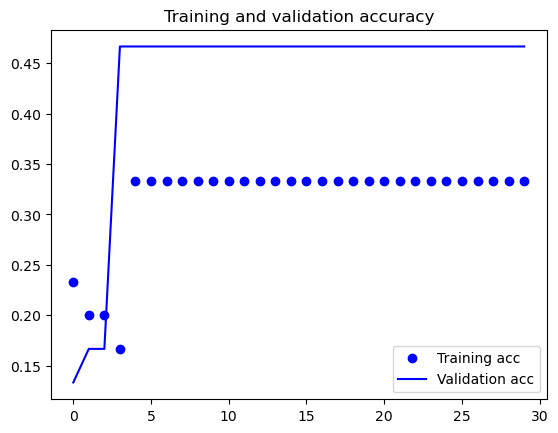

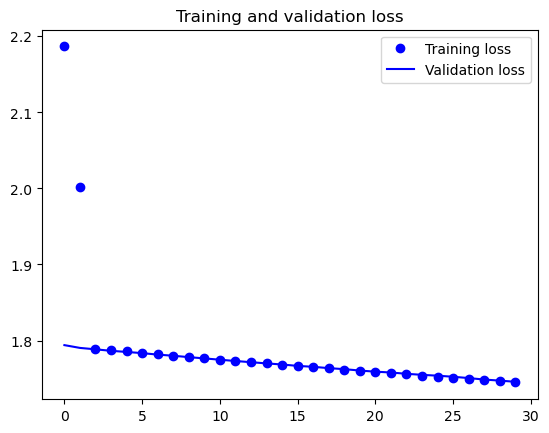

In [387]:
# Plot history
acc = baseline_histoire.history['accuracy']
val_acc = baseline_histoire.history['val_accuracy']
loss = baseline_histoire.history['loss']
val_loss = baseline_histoire.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show();


#### Confusion Matrix

In [388]:
test_images.shape

(30, 200, 200, 3)

In [389]:
test_img.shape

(30, 120000)

In [390]:
baseline_predictions = baseline_model.predict(x = test_images, batch_size = 32, verbose = 0)
baseline_rounded_predictions = np.argmax(baseline_predictions, axis = -1)
baseline_rounded_labels = np.argmax(test_labels, axis=1)
baseline_cm = confusion_matrix(y_true = baseline_rounded_labels, y_pred = baseline_rounded_predictions)

2022-12-06 14:25:10.252033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [391]:
baseline_predictions

array([[0.17055556, 0.15224586, 0.17154555, 0.1718693 , 0.14927734,
        0.18450639],
       [0.17055556, 0.15224586, 0.17154555, 0.1718693 , 0.14927734,
        0.18450639],
       [0.17055556, 0.15224586, 0.17154555, 0.1718693 , 0.14927734,
        0.18450639],
       [0.17055556, 0.15224586, 0.17154555, 0.1718693 , 0.14927734,
        0.18450639],
       [0.17055556, 0.15224586, 0.17154555, 0.1718693 , 0.14927734,
        0.18450639],
       [0.17055556, 0.15224586, 0.17154555, 0.1718693 , 0.14927734,
        0.18450639],
       [0.17055556, 0.15224586, 0.17154555, 0.1718693 , 0.14927734,
        0.18450639],
       [0.17055556, 0.15224586, 0.17154555, 0.1718693 , 0.14927734,
        0.18450639],
       [0.17055556, 0.15224586, 0.17154555, 0.1718693 , 0.14927734,
        0.18450639],
       [0.17055556, 0.15224586, 0.17154555, 0.1718693 , 0.14927734,
        0.18450639],
       [0.17055556, 0.15224586, 0.17154555, 0.1718693 , 0.14927734,
        0.18450639],
       [0.17055556, 0

In [392]:
baseline_rounded_labels

array([5, 1, 2, 4, 4, 2, 5, 2, 4, 2, 1, 3, 1, 5, 5, 4, 5, 2, 2, 2, 5, 5,
       2, 5, 5, 5, 5, 5, 5, 2])

In [393]:
baseline_rounded_labels

array([5, 1, 2, 4, 4, 2, 5, 2, 4, 2, 1, 3, 1, 5, 5, 4, 5, 2, 2, 2, 5, 5,
       2, 5, 5, 5, 5, 5, 5, 2])

In [394]:
baseline_rounded_predictions

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5])

In [395]:
def plot_confusion_matrix_func(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

In [396]:
cm_plot_labels = test_class_names

Confusion matrix, without normalization
[[ 0  0  0  0  3]
 [ 0  0  0  0  9]
 [ 0  0  0  0  1]
 [ 0  0  0  0  4]
 [ 0  0  0  0 13]]


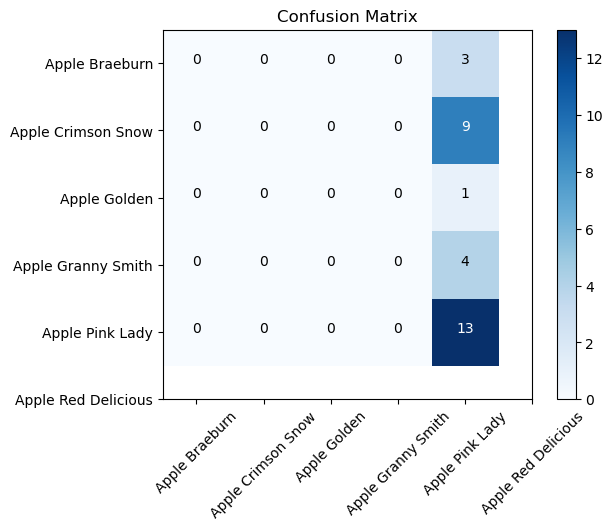

In [397]:
plot_confusion_matrix_func(cm = baseline_cm, classes = cm_plot_labels, title='Confusion Matrix')

In [398]:
type(baseline_cm)

numpy.ndarray

In [399]:
test_labels

array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]], dtype=flo

#### Second Model

In [400]:
sz = 200

# Initializing the CNN
model1 = Sequential()

# First convolution layer and pooling
model1.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Second convolution layer and pooling
model1.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model1.add(Flatten(input_shape = (28,28)))

# Adding a fully connected layer
model1.add(Dense(units=96, activation='relu'))
model1.add(Dropout(0.40))
model1.add(Dense(units=32, activation='relu'))
model1.add(Dense(units=24, activation='softmax')) # softmax for more than 2

In [401]:
model1.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 73728)             0         
                                                                 
 dense_71 (Dense)            (None, 96)              

In [402]:
model1.compile(optimizer='adam',
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
               metrics=['accuracy'])

In [404]:
# history = model1.fit(
#     train_generator,
#     validation_data = test_generator,
#     epochs = 5
# )